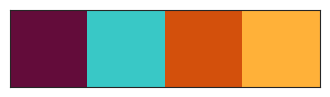

In [1]:

from __future__ import division, print_function, unicode_literals

import numpy as np, pandas as pd
import os
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
# Import my spotify data
songs = pd.read_csv("million_song_subset.csv",sep ="###")
songs.describe()

<ipython-input-3-204e4306754a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  songs = pd.read_csv("million_song_subset.csv",sep ="###")


,duration,year,danceability,energy,loudness,tempo,time_signature,segment_loudness_avg,chroma1,chroma2,...,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
count,2001.000000,2001.000000,2001.0,2001.0,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,...,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,239.048766,949.263368,0.0,0.0,-10.470449,123.901178,3.572714,-21.781629,0.439617,0.432177,...,12.523310,2.092360,-3.112370,-6.342697,-4.603535,-1.494636,2.836348,2.058439,-0.527855,2.858475
std,120.571065,997.730133,0.0,0.0,5.332978,35.619578,1.289510,6.895235,0.147224,0.156042,...,37.106786,16.771728,22.820345,13.951280,15.076646,7.944015,11.422175,6.520054,4.505618,8.464361
min,1.227300,0.000000,0.0,0.0,-38.148000,0.000000,1.000000,-53.867603,0.023072,0.030128,...,-143.294364,-59.069990,-106.338562,-46.708841,-61.888032,-35.255198,-105.477236,-34.291536,-29.732397,-36.852272
25%,174.967710,0.000000,0.0,0.0,-13.229000,97.955000,3.000000,-25.618484,0.333923,0.321942,...,-10.307785,-8.228139,-17.045173,-16.289065,-13.159650,-6.525686,-3.345032,-2.199086,-3.150522,-2.342099
50%,223.738320,0.000000,0.0,0.0,-9.328000,121.560000,4.000000,-20.995558,0.438035,0.426026,...,12.701588,0.175865,-2.302376,-7.685965,-3.968219,-1.606550,3.299847,1.999582,-0.315062,2.646102
75%,276.375060,2000.000000,0.0,0.0,-6.465000,145.930000,4.000000,-16.992897,0.541759,0.537195,...,32.536052,10.315454,10.620839,1.998848,4.846460,3.332260,9.345453,6.346157,2.145466,7.778944
max,1819.767710,2010.000000,0.0,0.0,0.566000,262.828000,7.000000,-6.892734,0.924037,0.954838,...,189.769800,95.966758,109.134489,61.588466,70.970634,32.364233,58.093843,28.906614,18.617534,43.519106


In [4]:
songs.columns

Index(['song_id', 'song_title', 'duration', 'year', 'danceability', 'energy',
       'loudness', 'tempo', 'time_signature', 'segment_loudness_avg',
       'chroma1', 'chroma2', 'chroma3', 'chroma4', 'chroma5', 'chroma6',
       'chroma7', 'chroma8', 'chroma9', 'chroma10', 'chroma11', 'chroma12',
       'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12'],
      dtype='object')

In [5]:
songs.head()

,song_id,song_title,duration,year,danceability,energy,loudness,tempo,time_signature,segment_loudness_avg,...,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
0,b'SORKXVV12A8C134C70',b'Price I Pay',327.15710,2003,0.0,0.0,-5.234,138.657,4,-17.524595,...,31.022386,-0.170568,-11.169491,-11.816197,-1.428855,-1.702527,6.041472,-1.016402,-1.799413,-8.479166
1,b'SOVFWRR12A58A7C25E',b'Never Again (Album Version)',189.20444,0,0.0,0.0,-3.110,149.998,3,-9.913434,...,23.431555,2.359056,-26.209123,-26.175516,11.425241,1.054028,9.386285,8.002425,3.091476,4.317224
2,b'SONTDOE12AAFF4446C',b'Earth Child (World)',225.72363,1999,0.0,0.0,-12.620,128.578,4,-24.758906,...,-19.457472,-14.393700,-15.510979,-1.480222,-6.761360,-6.632973,15.295603,-0.679436,-3.232442,-2.680127
3,b'SOPXZIE12AB017C4D4',b'Master_ Faster_ Sweet Desaster',207.77751,1999,0.0,0.0,-5.922,101.994,4,-13.581741,...,3.642942,-13.497909,-17.121308,-19.953319,-23.866205,-11.974122,-3.882522,1.861458,0.860511,-5.662918
4,b'SOQSCFU12A8C13DAC3',b'Silent Night (Featuring Geoffrey Jones_ Terr...,235.65016,0,0.0,0.0,-6.171,152.017,4,-13.560873,...,6.301115,-6.471546,8.312443,-29.116100,0.748665,1.361620,-8.491832,3.117790,2.387131,7.808582


In [6]:

songs.dtypes


,0
song_id,object
song_title,object
duration,float64
year,int64
danceability,float64
energy,float64
loudness,float64
tempo,float64
time_signature,int64
segment_loudness_avg,float64


In [84]:
df = songs

In [85]:
df.columns

Index(['song_id', 'song_title', 'duration', 'year', 'danceability', 'energy',
       'loudness', 'tempo', 'time_signature', 'segment_loudness_avg',
       'chroma1', 'chroma2', 'chroma3', 'chroma4', 'chroma5', 'chroma6',
       'chroma7', 'chroma8', 'chroma9', 'chroma10', 'chroma11', 'chroma12',
       'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='year', ylabel='duration'>,
        <Axes: xlabel='danceability', ylabel='duration'>, ...,
        <Axes: xlabel='MFCC10', ylabel='duration'>,
        <Axes: xlabel='MFCC11', ylabel='duration'>,
        <Axes: xlabel='MFCC12', ylabel='duration'>],
       [<Axes: xlabel='duration', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='danceability', ylabel='year'>, ...,
        <Axes: xlabel='MFCC10', ylabel='year'>,
        <Axes: xlabel='MFCC11', ylabel='year'>,
        <Axes: xlabel='MFCC12', ylabel='year'>],
       [<Axes: xlabel='duration', ylabel='danceability'>,
        <Axes: xlabel='year', ylabel='danceability'>,
        <Axes: xlabel='danceability', ylabel='danceability'>, ...,
        <Axes: xlabel='MFCC10', ylabel='danceability'>,
        <Axes: xlabel='MFCC11', ylabel='danceability'>,
        <Axes: xlabel='MFCC12', ylabel='danceability'>],
       ...,
       [<Axes: x

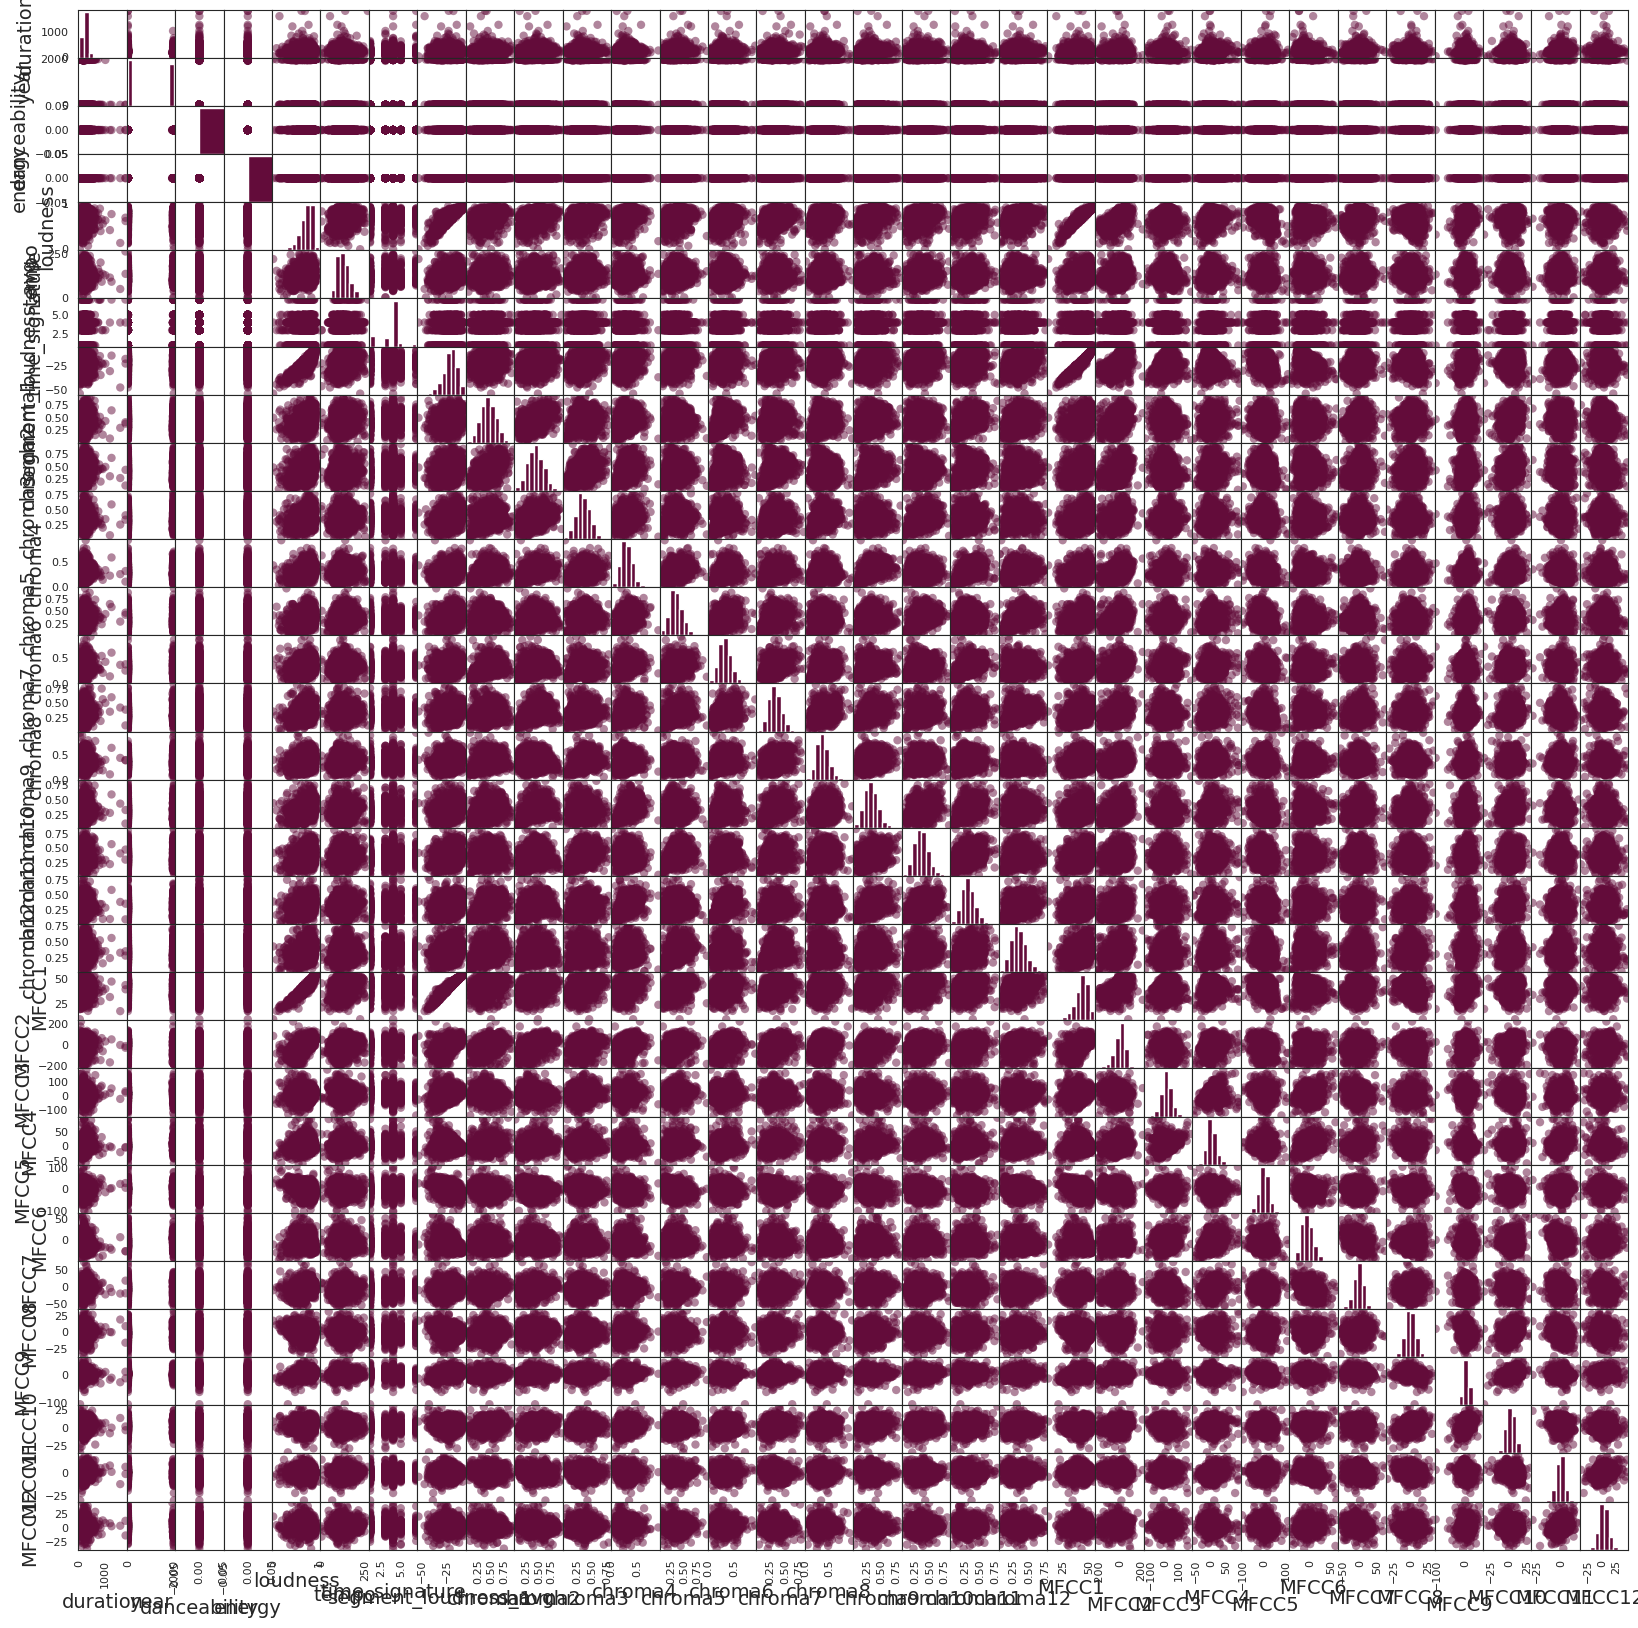

In [86]:
pd.plotting.scatter_matrix(df,figsize=(20,20),grid=True,marker='o')

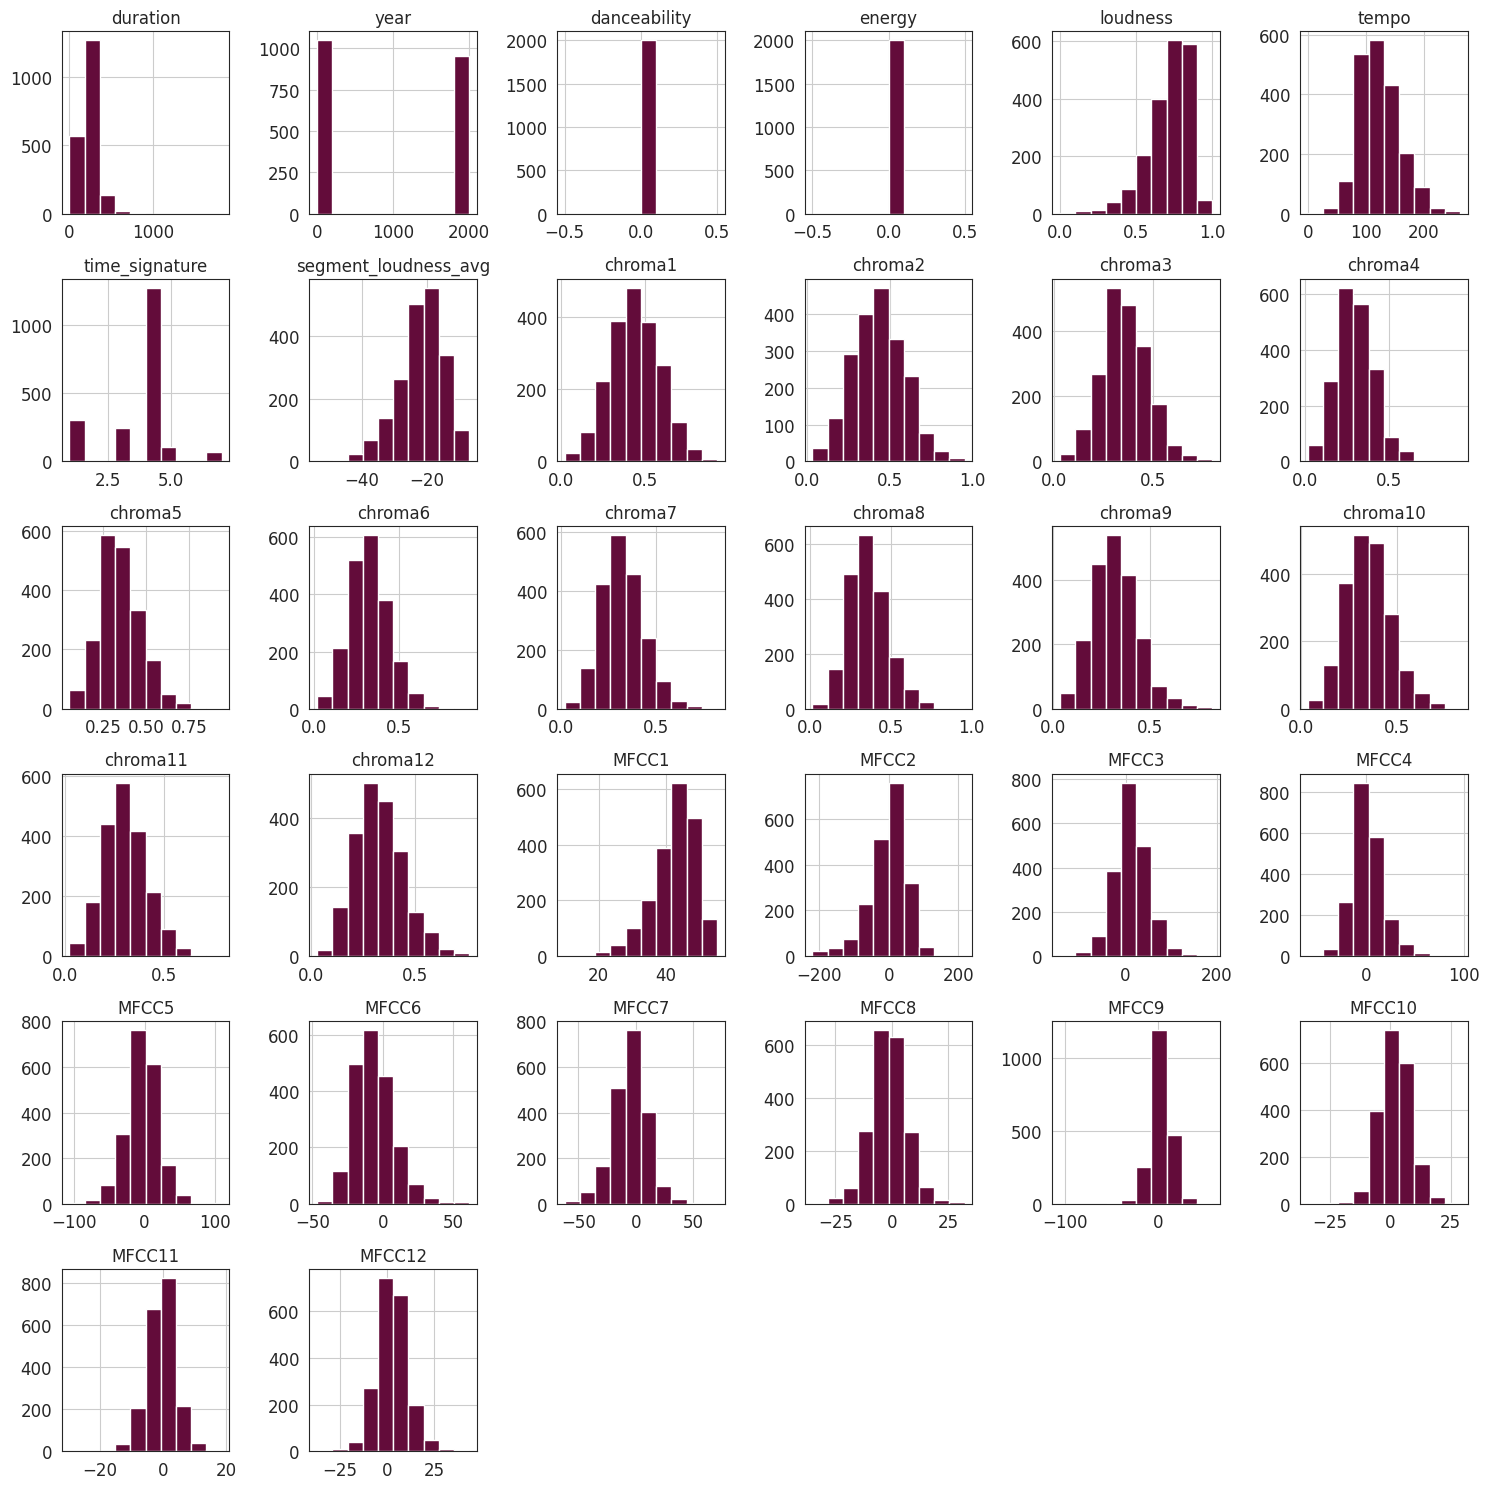

In [88]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [89]:
songs.columns

Index(['song_id', 'song_title', 'duration', 'year', 'danceability', 'energy',
       'loudness', 'tempo', 'time_signature', 'segment_loudness_avg',
       'chroma1', 'chroma2', 'chroma3', 'chroma4', 'chroma5', 'chroma6',
       'chroma7', 'chroma8', 'chroma9', 'chroma10', 'chroma11', 'chroma12',
       'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12'],
      dtype='object')

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'segment_loudness_avg'}>,
        <Axes: title={'center': 'chroma1'}>,
        <Axes: title={'center': 'chroma2'}>,
        <Axes: title={'center': 'chroma3'}>,
        <Axes: title={'center': 'chroma4'}>],
       [<Axes: title={'center': 'chroma5'}>,
        <Axes: title={'center': 'chroma6'}>,
        <Axes: title={'center': 'chroma7'}>,
        <Axes: title={'center': 'chroma8'}>,
        <Axes: title={'center': 'chroma9'}>,
        <Axes: title={'center': 'chroma10'}>],
       [<Axes: title={'center': 'chroma11'}>,
        <Axes: title={'center': 'chroma12'}>,
        <Axes: title={'center': 'MFCC1'}>,
        <Axes: title={'center'

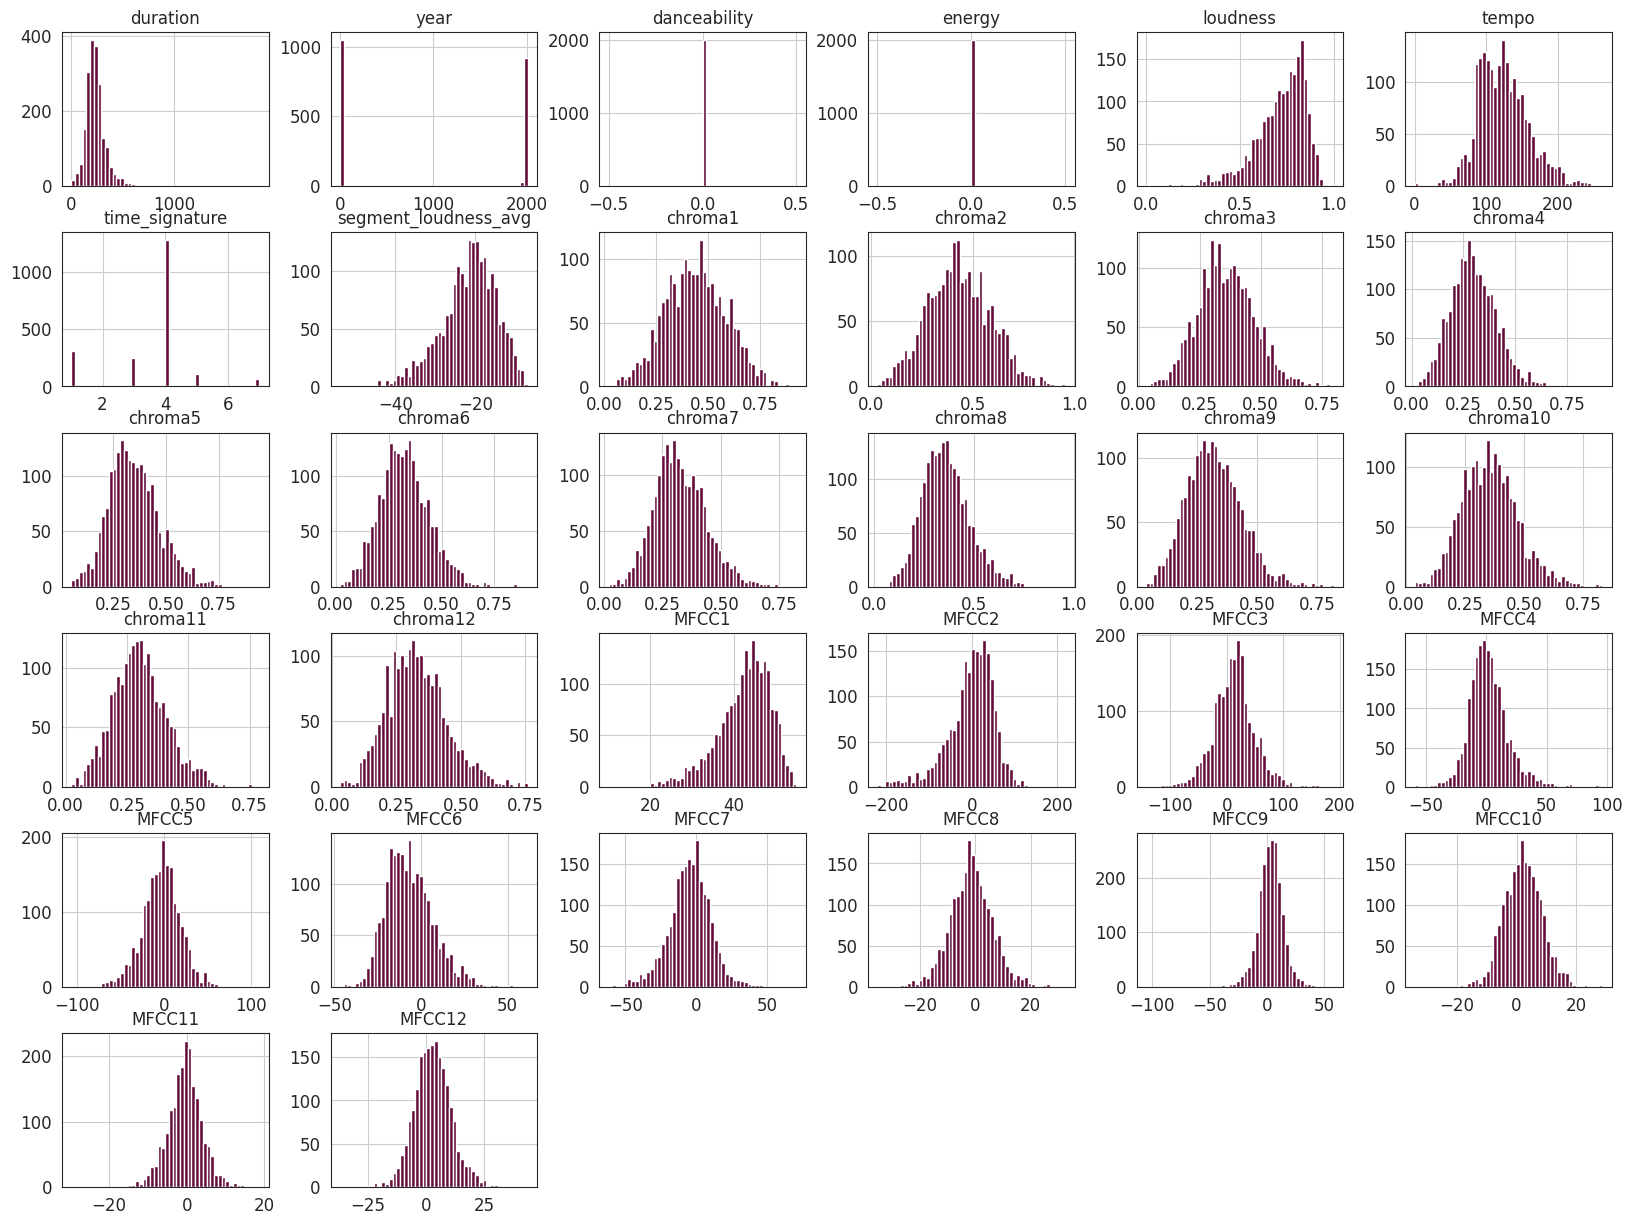

In [90]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
df['loudness'] = pd.DataFrame(loudness_scaled)

df.hist(bins=50,figsize=(20,15))

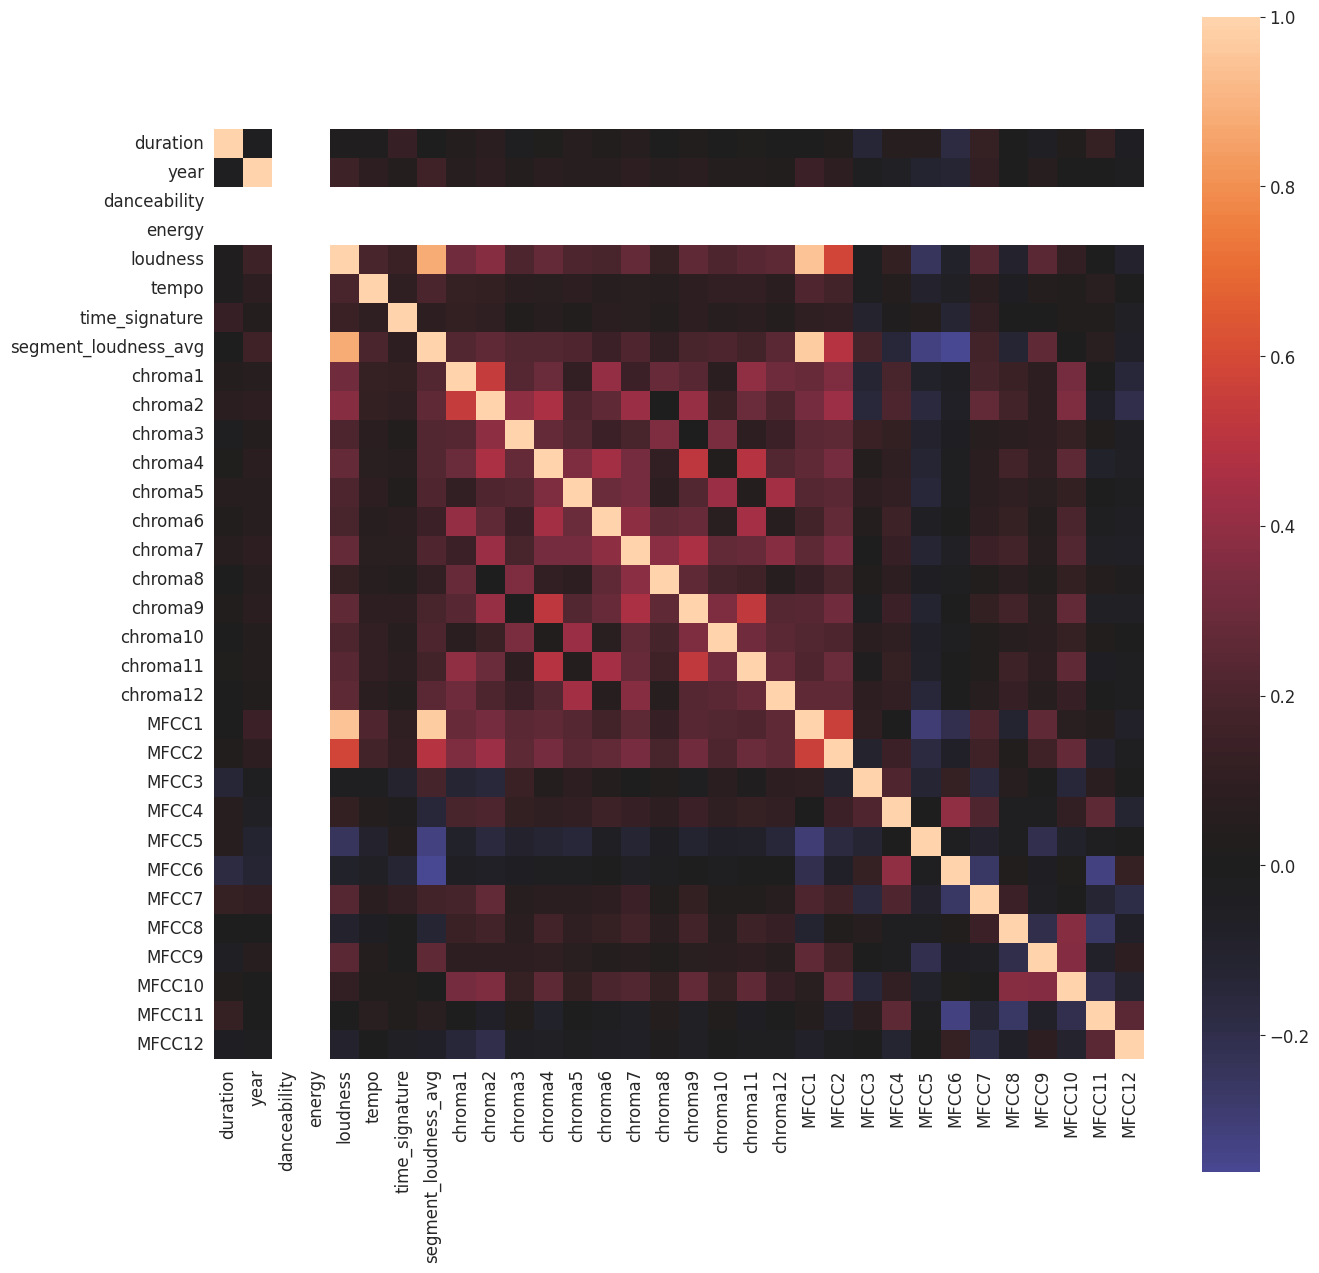

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numerical columns before calculating correlations
numerical_df1 = df.select_dtypes(include=['number'])

plt.gcf().set_size_inches(15, 15)
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(numerical_df1.corr(), center=0, annot=False, square=True)
plt.show()

In [105]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number'])

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical features only
scaled_data = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the scaled numerical features
data_scaled = pd.DataFrame(scaled_data, columns=numerical_features.columns)

data_scaled.head()

,duration,year,danceability,energy,loudness,tempo,...,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
0,0.179226,0.996517,0.0,0.0,0.850183,0.527558,...,0.455064,0.496199,0.681775,0.526521,0.577725,0.353025
1,0.103367,0.000000,0.0,0.0,0.905047,0.570708,...,0.551814,0.536964,0.702224,0.669228,0.678881,0.512241
2,0.123449,0.994527,0.0,0.0,0.659400,0.489210,...,0.414927,0.423284,0.738351,0.531853,0.548087,0.425178
3,0.113580,0.994527,0.0,0.0,0.832412,0.388064,...,0.286183,0.344296,0.621104,0.572058,0.632739,0.388065
4,0.128907,0.000000,0.0,0.0,0.825980,0.578390,...,0.471454,0.541513,0.592925,0.591937,0.664314,0.555681


In [106]:
songs_features = df.copy()
songs_features = songs_features.drop(['song_title', 'song_id'], axis=1)
songs_features.head()

,duration,year,danceability,energy,loudness,tempo,...,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
0,327.15710,2003,0.0,0.0,0.850183,138.657,...,-1.428855,-1.702527,6.041472,-1.016402,-1.799413,-8.479166
1,189.20444,0,0.0,0.0,0.905047,149.998,...,11.425241,1.054028,9.386285,8.002425,3.091476,4.317224
2,225.72363,1999,0.0,0.0,0.659400,128.578,...,-6.761360,-6.632973,15.295603,-0.679436,-3.232442,-2.680127
3,207.77751,1999,0.0,0.0,0.832412,101.994,...,-23.866205,-11.974122,-3.882522,1.861458,0.860511,-5.662918
4,235.65016,0,0.0,0.0,0.825980,152.017,...,0.748665,1.361620,-8.491832,3.117790,2.387131,7.808582


In [107]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [108]:
#predicting the clusters
pd.options.display.max_columns = 13
#labels_ is used to identify the Labels of each point
predictions = km.labels_
type(predictions)
data_scaled['clusters']= predictions
data_scaled.head(5)

,duration,year,danceability,energy,loudness,tempo,...,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,clusters
0,0.179226,0.996517,0.0,0.0,0.850183,0.527558,...,0.496199,0.681775,0.526521,0.577725,0.353025,2
1,0.103367,0.000000,0.0,0.0,0.905047,0.570708,...,0.536964,0.702224,0.669228,0.678881,0.512241,8
2,0.123449,0.994527,0.0,0.0,0.659400,0.489210,...,0.423284,0.738351,0.531853,0.548087,0.425178,13
3,0.113580,0.994527,0.0,0.0,0.832412,0.388064,...,0.344296,0.621104,0.572058,0.632739,0.388065,10
4,0.128907,0.000000,0.0,0.0,0.825980,0.578390,...,0.541513,0.592925,0.591937,0.664314,0.555681,8


In [109]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.9158591575172801)
For n_clusters = 3, silhouette score is 0.7312129042367144)
For n_clusters = 4, silhouette score is 0.5565634201722421)
For n_clusters = 5, silhouette score is 0.3513665909784346)
For n_clusters = 6, silhouette score is 0.32051725703204076)
For n_clusters = 7, silhouette score is 0.24183062981547676)
For n_clusters = 8, silhouette score is 0.2683608722714598)
For n_clusters = 9, silhouette score is 0.21100196305916544)
For n_clusters = 10, silhouette score is 0.1932604475219803)
For n_clusters = 11, silhouette score is 0.18876502479666676)
For n_clusters = 12, silhouette score is 0.16804316654521984)
For n_clusters = 13, silhouette score is 0.1724503737176436)
For n_clusters = 14, silhouette score is 0.17487956761944487)


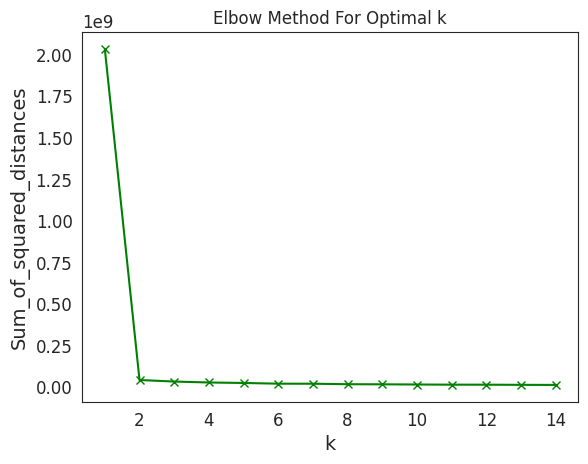

In [110]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [111]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)
y_kmeans = kmeans.labels_

In [112]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(data_scaled.drop(['clusters'],axis=1)),columns=['PC1','PC2'])
pca_data['clusters']=predictions

Text(0.5, 1.0, 'Music Recommendation after PCA')

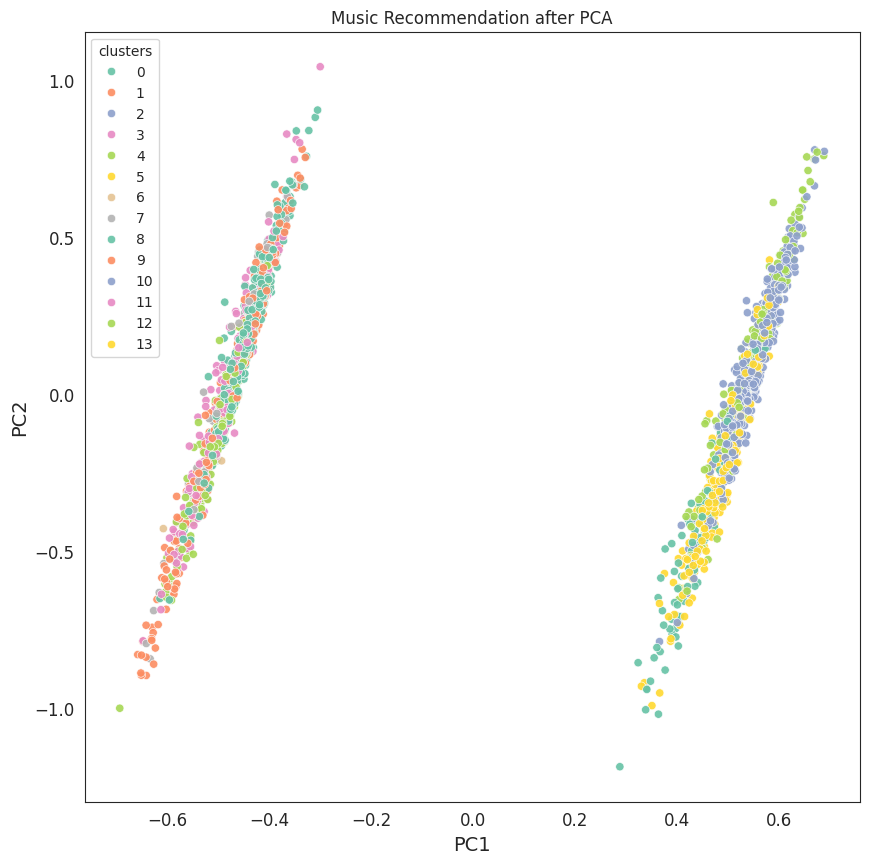

In [113]:
#RESULTS Analysis
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='clusters',palette='Set2' , alpha = 0.9)
plt.title('Music Recommendation after PCA')

In [114]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


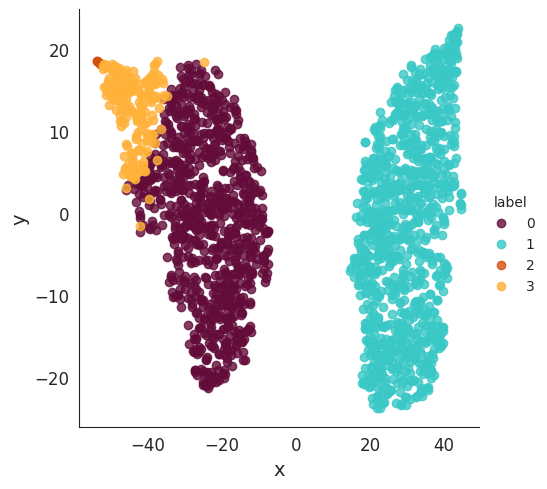

In [115]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label',
                   fit_reg=False, legend=True, legend_out=True)

In [125]:
pca.explained_variance_ratio_


array([0.33156623, 0.1490878 ])

The 1st principal component explains ~97.9% of the variance

The 2nd explains ~1.4%

The rest (if any) are negligible

In [126]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      duration      year  danceability        energy  loudness     tempo  ...  \
PC-1 -0.003559  0.980515 -1.110223e-16 -2.220446e-16  0.067987  0.034208  ...   
PC-2  0.013519 -0.184539  5.551115e-17 -1.110223e-16  0.279504  0.086640  ...   

         MFCC7     MFCC8     MFCC9    MFCC10    MFCC11    MFCC12  
PC-1  0.032249  0.005442  0.011028  0.008648  0.000303 -0.010389  
PC-2  0.083287  0.053263  0.040106  0.110395 -0.009168 -0.045275  

[2 rows x 32 columns]


next

In [127]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

,count
label,
1,951
0,859
3,186
2,5


In [128]:
songs[songs['label'] == 0].tail(3)

,song_id,song_title,duration,year,danceability,energy,...,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,label
500,b'SOBNTOJ12A8C133435',b'Whip Fight',95.94730,2003,0.0,0.0,...,-8.328044,-6.740069,-0.645701,4.058137,-3.295195,0
1694,b'SOSSOBZ12AF72A294F',b'Wanderlust',269.71383,2007,0.0,0.0,...,-5.490135,10.591593,0.435783,4.320782,2.420704,0
489,b'SOGRSPK12A8A9D88E0',b'Subliminal ohne Naturgeraeusche',1203.53914,0,0.0,0.0,...,0.312034,-17.996951,-7.981745,7.149484,7.519730,0


In [130]:
songs[songs['label']==2].head(3)

,song_id,song_title,duration,year,danceability,energy,...,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,label
621,b'SOIXCZJ12A8C140279',b'La Medalla',215.32689,2001,0.0,0.0,...,1.032465,-6.782295,5.117529,0.563599,2.483125,2
271,b'SOUWZWV12AB0181ACF',b'Prayer Walk',185.28608,0,0.0,0.0,...,-12.219806,7.118278,-5.667286,4.060265,14.968142,2
212,b'SODMADA12A8C139707',b'Master Mantrol (Dub / Instrumental Reggae Mu...,261.79873,0,0.0,0.0,...,-1.156491,-1.155655,-5.544738,0.291412,-18.481646,2


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'segment_loudness_avg'}>,
        <Axes: title={'center': 'chroma1'}>,
        <Axes: title={'center': 'chroma2'}>,
        <Axes: title={'center': 'chroma3'}>,
        <Axes: title={'center': 'chroma4'}>],
       [<Axes: title={'center': 'chroma5'}>,
        <Axes: title={'center': 'chroma6'}>,
        <Axes: title={'center': 'chroma7'}>,
        <Axes: title={'center': 'chroma8'}>,
        <Axes: title={'center': 'chroma9'}>,
        <Axes: title={'center': 'chroma10'}>],
       [<Axes: title={'center': 'chroma11'}>,
        <Axes: title={'center': 'chroma12'}>,
        <Axes: title={'center': 'MFCC1'}>,
        <Axes: title={'center'

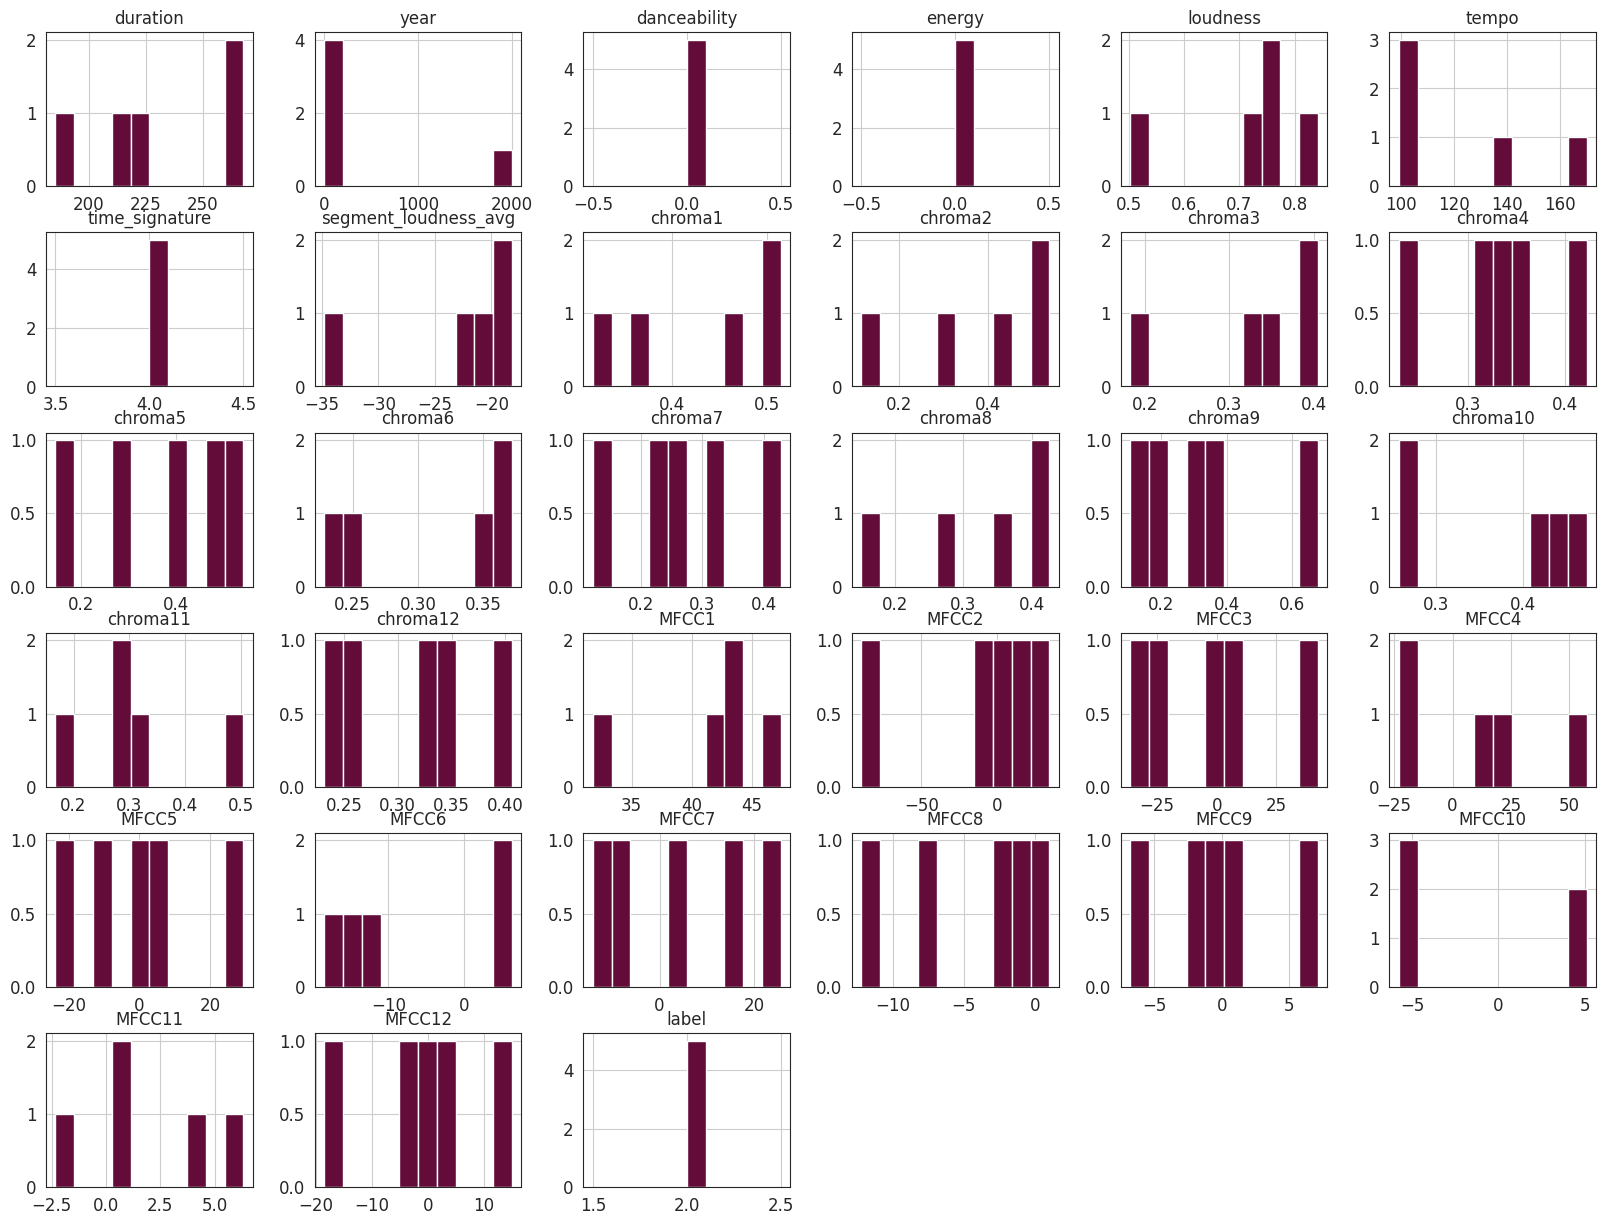

In [129]:
songs[songs['label']==2].hist(figsize=(20,15))

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [132]:
y_pred = rfc.predict(X_test)

In [134]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Predicted Mood  Chill  Energetic  Romantic
Actual Mood                               
Cheerful            0          0         3
Chill             265          0         0
Energetic           0        337         0
Romantic            0          0        56
Confusion matrix, without normalization
[[265   0   0   0]
 [  0 337   0   0]
 [  0   0   0   3]
 [  0   0   0  56]]


<Axes: title={'center': 'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

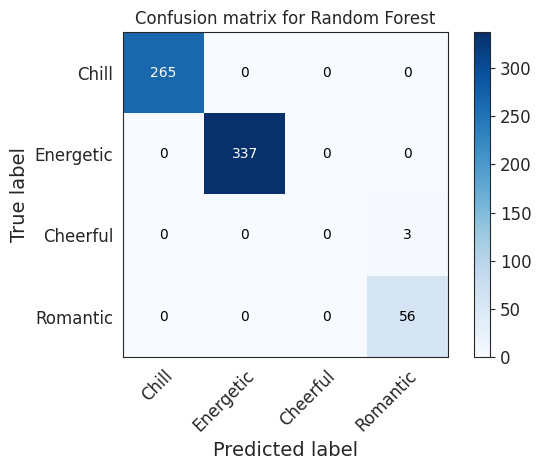

In [135]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Romantic']
reversefactor = dict(zip(range(4),definitions))
actual = np.vectorize(reversefactor.get)(y_test)
pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [136]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('duration', np.float64(0.15888079648654857)),
 ('year', np.float64(0.5685823630741064)),
 ('danceability', np.float64(0.0)),
 ('energy', np.float64(0.0)),
 ('loudness', np.float64(0.011796229826489545)),
 ('tempo', np.float64(0.009390673834090523)),
 ('time_signature', np.float64(0.002466939499384458)),
 ('segment_loudness_avg', np.float64(0.01163109547140336)),
 ('chroma1', np.float64(0.008139073904440795)),
 ('chroma2', np.float64(0.011532649058131426)),
 ('chroma3', np.float64(0.008035346999116528)),
 ('chroma4', np.float64(0.010035129858561765)),
 ('chroma5', np.float64(0.009533859558720374)),
 ('chroma6', np.float64(0.00852313615148059)),
 ('chroma7', np.float64(0.009169455724957094)),
 ('chroma8', np.float64(0.010128574979894717)),
 ('chroma9', np.float64(0.00906054241338905)),
 ('chroma10', np.float64(0.008353000388737961)),
 ('chroma11', np.float64(0.007687368674945014)),
 ('chroma12', np.float64(0.008341077510830647)),
 ('MFCC1', np.float64(0.009556768799466217)),
 ('MFCC2',

In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [138]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[264   0   0   1]
 [  0 337   0   0]
 [  0   0   1   2]
 [  6   0   0  50]]


<Axes: title={'center': 'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

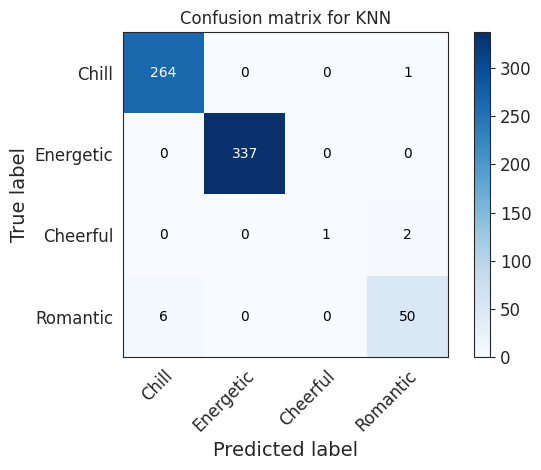

In [139]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [140]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear")

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[264   0   0   1]
 [  0 337   0   0]
 [  0   0   1   2]
 [  1   0   0  55]]


<Axes: title={'center': 'Confusion matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

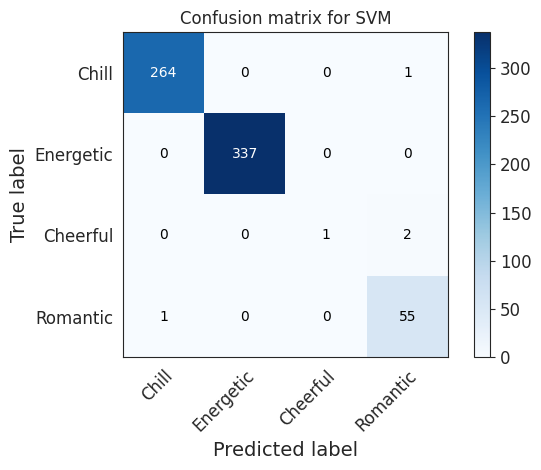

In [141]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [142]:
from sklearn.neural_network import MLPClassifier

In [143]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [144]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[256   1   0   8]
 [  0 337   0   0]
 [  0   0   3   0]
 [  7   0   0  49]]


<Axes: title={'center': 'Confusion matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

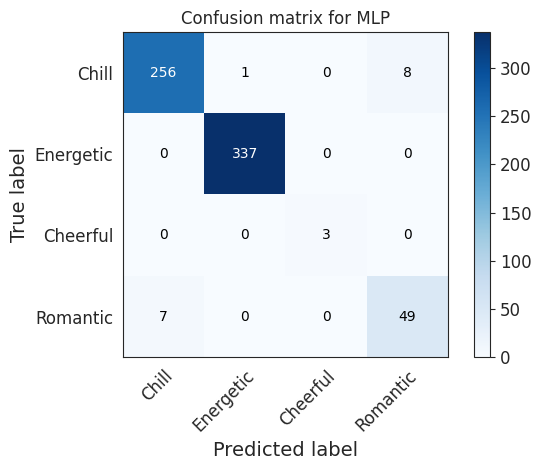

In [145]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [146]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.97      0.97      0.97       265
   Energetic       1.00      1.00      1.00       337
    Cheerful       1.00      1.00      1.00         3
    Romantic       0.86      0.88      0.87        56

    accuracy                           0.98       661
   macro avg       0.96      0.96      0.96       661
weighted avg       0.98      0.98      0.98       661
MLP


In [147]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00       265
   Energetic       1.00      1.00      1.00       337
    Cheerful       1.00      0.33      0.50         3
    Romantic       0.95      0.98      0.96        56

    accuracy                           0.99       661
   macro avg       0.99      0.83      0.87       661
weighted avg       0.99      0.99      0.99       661
SVM


In [148]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       0.98      1.00      0.99       265
   Energetic       1.00      1.00      1.00       337
    Cheerful       1.00      0.33      0.50         3
    Romantic       0.94      0.89      0.92        56

    accuracy                           0.99       661
   macro avg       0.98      0.81      0.85       661
weighted avg       0.99      0.99      0.99       661
KNN


In [149]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00       265
   Energetic       1.00      1.00      1.00       337
    Cheerful       0.00      0.00      0.00         3
    Romantic       0.95      1.00      0.97        56

    accuracy                           1.00       661
   macro avg       0.74      0.75      0.74       661
weighted avg       0.99      1.00      0.99       661
forest


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [151]:
songs['label'] = songs['label'].replace([1],'energetic')
songs['label'] = songs['label'].replace([0],'Chill')
songs['label'] = songs['label'].replace([2],'cheerful')
songs['label'] = songs['label'].replace([3],'romantic')

songs.to_csv("ClassifiedMusicData.csv",index=False)

In [150]:
songs.head()

,song_id,song_title,duration,year,danceability,energy,...,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,label
838,b'SOFHCUH12AB0183CA2',b'Free',311.95383,0,0.0,0.0,...,0.176526,-7.635567,-0.949505,-7.061722,-2.393910,1
1797,b'SOPSNHW12A8C141B9A',b'Ride On The Rhythm',370.49424,0,0.0,0.0,...,9.030053,7.634041,8.297489,6.009815,2.477904,3
624,b'SOBEMGL12A6D4F9A50',b'Getting Old Sucks (Album Version)',132.96281,0,0.0,0.0,...,0.366072,2.481505,7.566637,-7.310585,8.289431,1
1968,b'SOUNPPV12A8C13F5D3',b'The Song Remains The Same (2007 Remastered A...,330.78812,2007,0.0,0.0,...,12.385411,-21.500595,-5.159257,3.059513,7.400136,3
914,b'SOJMRHG12AB018B633',b'Un Minuto Contigo (One Moment)',135.88853,0,0.0,0.0,...,-12.709232,-2.392631,-2.222631,2.879758,6.861540,3


In [152]:
cluster_0 = songs[songs['label']=="Chill"]
cluster_1 = songs[songs['label']=="energetic"]
cluster_2 = songs[songs['label']=="cheerful"]
cluster_3 = songs[songs['label']=="romantic"]

cluster_0.to_csv("cluster0.csv",index=False)
cluster_1.to_csv("cluster1.csv",index=False)
cluster_2.to_csv("cluster2.csv",index=False)
cluster_3.to_csv("cluster3.csv",index=False)


In [153]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('mlp', mlp),
        ('knn', knn)
    ],
    voting='hard'  # majority vote
)

ensemble.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('svm', SVC(kernel='linear')),
                             ('mlp', MLPClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [156]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('mlp', mlp),
        ('knn', knn)
    ],
    voting='hard'  # majority vote
)

ensemble.fit(X_train, y_train)

# Predict using the ensemble model and store the results in ensemble_pred
ensemble_pred = ensemble.predict(X_test)

print(classification_report(y_test,ensemble_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       0.99      0.99      0.99       265
   Energetic       1.00      1.00      1.00       337
    Cheerful       1.00      0.33      0.50         3
    Romantic       0.93      0.96      0.95        56

    accuracy                           0.99       661
   macro avg       0.98      0.82      0.86       661
weighted avg       0.99      0.99      0.99       661
forest


In [157]:
!pip install joblib
import joblib
joblib.dump(ensemble, "final_ensemble_model.pkl")
print("✅ Ensemble model saved.")
joblib.dump(scaler, "scaler.pkl")


✅ Ensemble model saved.


['scaler.pkl']